In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/twitter_dataset.csv', encoding = 'latin-1')

In [3]:
from sklearn.preprocessing import StandardScaler
features = ['name_wt','statuses_count', 'followers_count', 'friends_count','favourites_count','listed_count']
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['label']].values
x = StandardScaler().fit_transform(x)

In [4]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [5]:
number_of_components=2
pca = PCA(n_components=number_of_components)
principalComponents = pca.fit_transform(x)
column_names= [] 

for i in range(1,number_of_components+1):
    print(i)
    column_names.append('principal_component_'+str(i))
    
principalDf = pd.DataFrame(data = principalComponents
             , columns = column_names)
principalDf['label']=y

1
2


In [6]:
principalDf

,principal_component_1,principal_component_2,label
0,-0.213308,-0.688997,0
1,-0.149278,0.273308,0
2,-0.121846,0.005906,0
3,-0.211176,-0.319715,0
4,0.114813,0.000245,1
5,0.088197,-0.368168,1
6,-0.013371,0.665013,0
7,-0.171361,-0.653469,0
8,-0.009891,1.428055,0
9,0.236133,0.280057,0


In [13]:
export_csv = principalDf.to_csv ('data/twitter_dataset2.csv', index = None, header=True) 

KeyError: 'target'

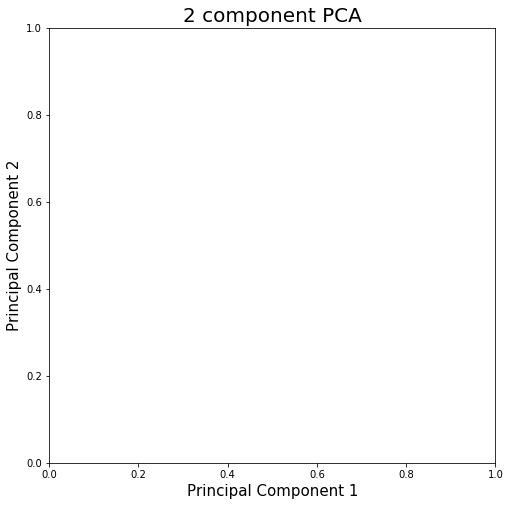

In [11]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()